# EU City Temperatures

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing/analysis

### Load the CSV file

In [81]:
df = pd.read_csv('EuCitiesTemperatures.csv')
df.head()

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79


### Fill in the missing latitude and longitude values

In [72]:
country_avg = df.groupby('country')[['latitude', 'longitude']].mean().round(2)

for i, row in df.iterrows():
    if pd.isna(row['latitude']):
        country              = row['country']
        latitude_avg         = country_avg.loc[country, 'latitude']
        df.at[i, 'latitude'] = latitude_avg

for i, row in df.iterrows():
    if pd.isna(row['longitude']):
        country               = row['country']
        longitude_avg         = country_avg.loc[country, 'longitude']
        df.at[i, 'longitude'] = longitude_avg
        
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


### Find the subset of cities in latitudes 40 - 60 and longitudes 15 - 30

In [73]:
subset_cities = df[(df['latitude'] >= 40) & (df['latitude'] <= 60) & (df['longitude'] >= 15) & (df['longitude'] <= 30)]

subset_cities

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42
...,...,...,...,...,...,...,...,...
165,Bursa,Turkey,79.62,no,yes,40.20,29.07,11.16
169,Edirne,Turkey,79.62,no,yes,41.67,26.57,NaN
183,Tekirdag,Turkey,79.62,no,yes,40.99,27.51,13.02
186,Chernivtsi,Ukraine,44.62,no,yes,48.71,25.92,7.06


### Find the countries with a maximal number of such cities

In [74]:
count = subset_cities.groupby('country')['city'].count()

max_countries = count[count == count.max()].index.tolist()

max_countries

['Poland', 'Romania']

### Fill in the missing temperature values

In [75]:
df['region_type'] = df.apply(lambda 
                             row: 'EU/coastline'     if row['EU'] == 'yes' and row['coastline'] == 'yes'
                             else 'EU/non_coastline' if row['EU'] == 'yes' and row['coastline'] == 'no'
                             else 'non_EU/coastline' if row['EU'] == 'no'  and row['coastline'] == 'yes'
                             else 'non_EU/non_coastline', axis = 1)

temps = df.groupby('region_type')['temperature'].mean()

df['temperature'] = df.apply(lambda
                             row: temps[row['region_type']] if pd.isna(row['temperature'])
                             else row['temperature'], axis = 1)

df

,city,country,population,EU,coastline,latitude,longitude,temperature,region_type
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180000,non_EU/coastline
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.481538,non_EU/non_coastline
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.540000,EU/non_coastline
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.910000,EU/non_coastline
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.790000,EU/non_coastline
...,...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.314494,EU/coastline
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.140000,EU/coastline
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.000000,EU/coastline
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.600000,EU/coastline


## Visualization

### Bar chart of number of cities in each region

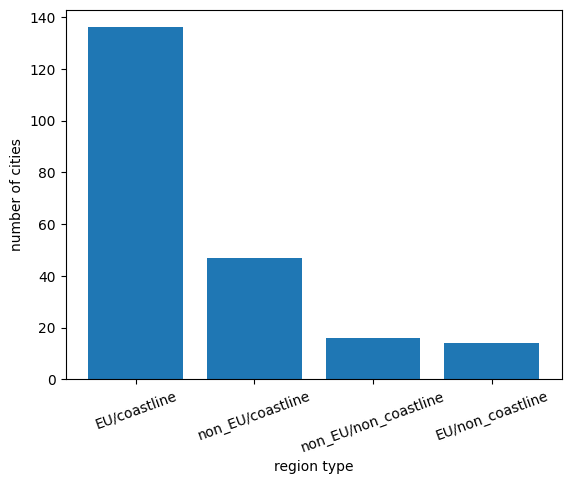

In [76]:
count = df['region_type'].value_counts()

# for region in count:
#     print(region)

plt.bar(x = count.index, height = count.values)

plt.xlabel('region type')
plt.ylabel('number of cities')

plt.xticks(rotation = 20)
plt.show()

### Scatter plot of cities' latitude/longitude

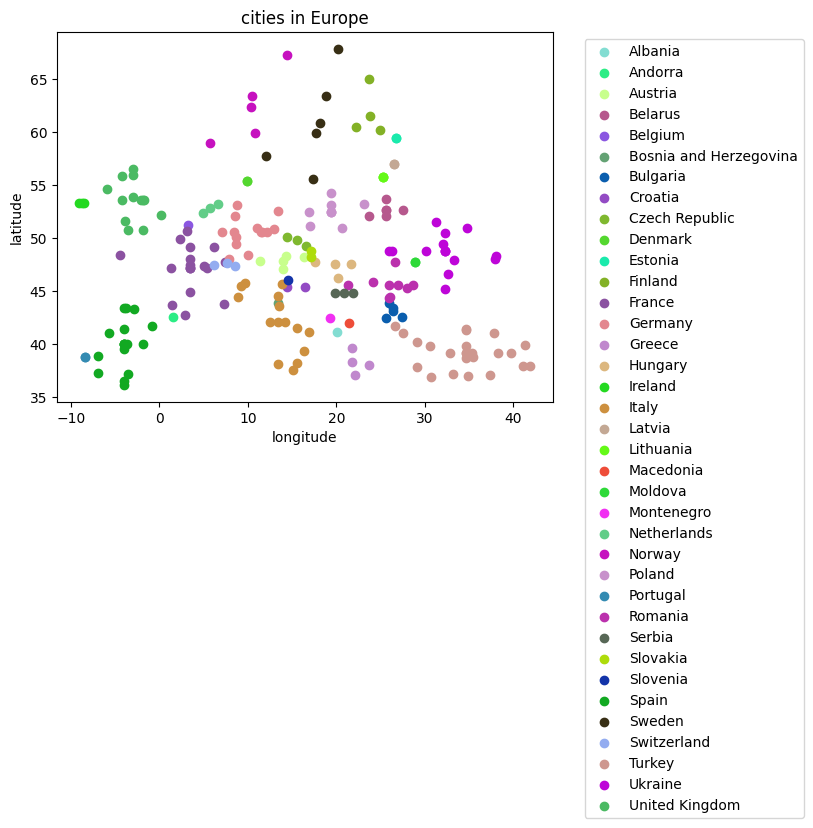

In [77]:
groups = df.groupby('country')

for country, group in groups:
    plt.scatter(group['longitude'], group['latitude'], label = country, c = np.random.rand(len(np.random.randn(1)),3))

plt.title('cities in Europe')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()


### Histogram of country population

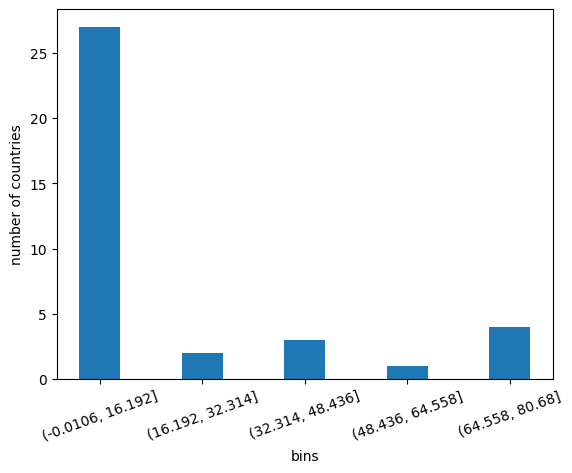

In [78]:
country_population = df.groupby('country')['population'].max()
# print(country_population)

bins = pd.cut(country_population, bins = 5)
# print(bins)

count = bins.value_counts(sort = False)

fig, ax = plt.subplots()
ax.bar(count.index.astype(str), count.values, width = 0.4)
ax.set_xlabel('bins')
ax.set_ylabel('number of countries')
plt.xticks(rotation = 20)
plt.show()

### Scatter plots of city vs latitude for each region

/var/folders/85/x9hb058x0hv1yvhsr2bs8s1m0000gn/T/ipykernel_90704/2939305547.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['temp_color'] = region_df.temperature.apply(lambda x: next((k for k, v in colors.items() if v(x)), ''))


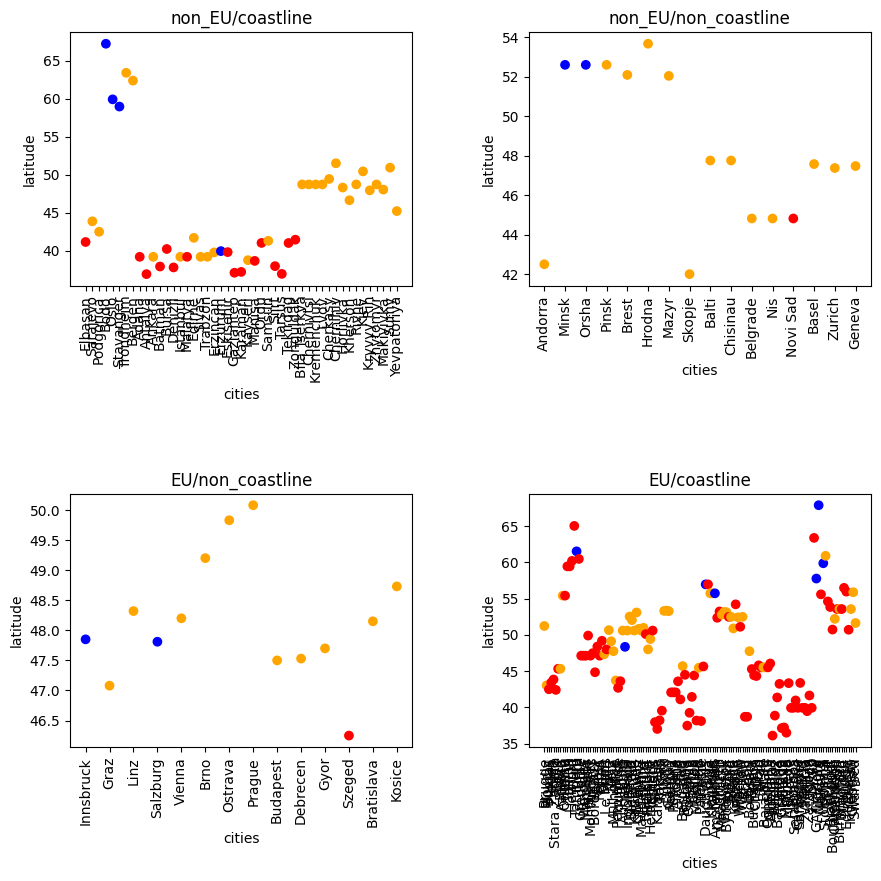

In [79]:
colors = {'red':    lambda x: x > 10,
          'orange': lambda x: 6 <= x <= 10,
          'blue':   lambda x: x < 6}

fig, axs = plt.subplots(2, 2, figsize = (10, 10))

for i, region_type in enumerate(df.region_type.unique()):
    region_df = df[df.region_type == region_type]
    df.loc[region_df.index, 'temp_color'] = region_df.temperature.apply(lambda x: next((k for k, v in colors.items() if v(x)), ''))
    region_df['temp_color'] = region_df.temperature.apply(lambda x: next((k for k, v in colors.items() if v(x)), ''))
    axs[i // 2, i % 2].scatter(range(len(region_df)), region_df.latitude, c = region_df.temp_color)
    axs[i // 2, i % 2].set_xticks(range(len(region_df)))
    axs[i // 2, i % 2].set_xticklabels(region_df.city, rotation=90)
    axs[i // 2, i % 2].set_xlabel('cities')
    axs[i // 2, i % 2].set_ylabel('latitude')
    axs[i // 2, i % 2].set_title(region_type)

fig.tight_layout(pad = 5.0)
plt.show()